<a href="https://colab.research.google.com/github/tranhuuan170302/Tran-Huu-An-data-analyst/blob/main/ph%C3%A2n_ti%CC%81ch_review_cu%CC%89a_kha%CC%81ch_ha%CC%80ng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [3]:
df = pd.read_csv("/content/drive/MyDrive/phân tích dữ liệu/tiền xử lí dữ liệu/data/Credit_Scoring.csv")

In [4]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

- trực quan hóa biểu đồ

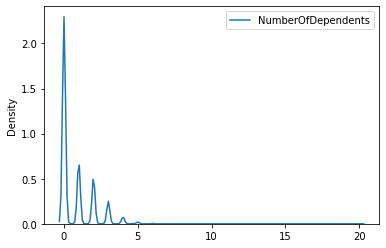

In [6]:
sns.kdeplot(data= df[['NumberOfDependents']])

- tìm dữ liệu bị khuyết thiếu

In [7]:
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29730
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
df1 = df[df['NumberOfDependents'].isna() == True]

In [9]:
df1.index

Int64Index([     0,     88,    101,    151,    230,    255,    276,    373,
               374,    404,
            ...
            149740, 149746, 149761, 149782, 149788, 149818, 149846, 149886,
            149940, 149957],
           dtype='int64', length=3924)

In [10]:
df_2 = df.drop(index = df1.index, inplace = False)

In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146068 entries, 1 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            146068 non-null  int64  
 1   SeriousDlqin2yrs                      146068 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  146068 non-null  float64
 3   age                                   146068 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  146068 non-null  int64  
 5   DebtRatio                             146068 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       146068 non-null  int64  
 8   NumberOfTimes90DaysLate               146068 non-null  int64  
 9   NumberRealEstateLoansOrLines          146068 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  146068 non-null  int64  
 11  

In [12]:
type(df_2)

pandas.core.frame.DataFrame

- thay thế các giá trị null ở MonthlyIncome   bằng một giá trị thường hay xuất hiện

In [13]:
df_2.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           25806
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
dtype: int64

In [14]:
df_2.fillna(value={'MonthlyIncome':  df_2['MonthlyIncome'].mode()})

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
5,14,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [15]:
type(df_2)

pandas.core.frame.DataFrame

In [16]:
df_2.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           25806
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
dtype: int64

In [17]:
df_2[df_2['MonthlyIncome'].isna() == True]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
24,33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
33,42,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
44,53,0,1.000000,62,0,0.0,NaN,1,0,0,0,0.0
50,59,0,0.541109,43,0,2477.0,NaN,3,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149968,149977,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149969,149978,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149976,149985,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149984,149993,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


# xử lí dữ liệu ngoại lai

# thay thế dữ liệu khuyết thiếu bởi giá trị nội suy theo cột

In [18]:
df2 = df.interpolate(axis=1)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  float64
 1   SeriousDlqin2yrs                      149992 non-null  float64
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  float64
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  float64
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         149992 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  float64
 8   NumberOfTimes90DaysLate               149992 non-null  float64
 9   NumberRealEstateLoansOrLines          149992 non-null  float64
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  float64
 11  

In [20]:
df2.isna().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

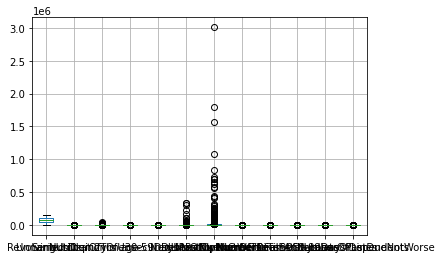

In [21]:
df2.boxplot()

# vẽ biểu đồ boxplot MonthlyIncome 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


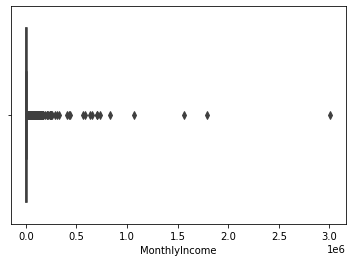

In [23]:
sns.boxplot(df['MonthlyIncome'])

In [24]:
# tính dữ liệu ngoại lai
q1 = df2.quantile(0.25)
q3 = df2.quantile(0.75)

In [25]:
IQR = q3 -q1

In [26]:
IQR

Unnamed: 0                              74995.500000
SeriousDlqin2yrs                            0.000000
RevolvingUtilizationOfUnsecuredLines        0.529149
age                                        22.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.693217
MonthlyIncome                            5471.500000
NumberOfOpenCreditLinesAndLoans             6.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                2.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          1.000000
dtype: float64

In [27]:
df3 = df2[~((df2 < (q1 - 1.5 * IQR)) | (df2 > (q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
df3.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,76890.000000,76890.0,76890.000000,76890.000000,76890.0,76890.000000,76890.000000,76890.000000,76890.0,76890.000000,76890.0,76890.000000
mean,75092.319508,0.0,0.264318,52.929185,0.0,0.317611,5714.681226,8.049395,0.0,0.931552,0.0,0.518390
std,43259.698005,0.0,0.317195,15.385704,0.0,0.281695,3249.853682,4.299490,0.0,0.942512,0.0,0.743525
min,11.000000,0.0,0.000000,21.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,37747.250000,0.0,0.023148,41.000000,0.0,0.111378,3312.000000,5.000000,0.0,0.000000,0.0,0.000000
50%,75268.500000,0.0,0.111537,53.000000,0.0,0.268449,5125.000000,7.000000,0.0,1.000000,0.0,0.000000
75%,112463.750000,0.0,0.417336,64.000000,0.0,0.443096,7705.750000,11.000000,0.0,2.000000,0.0,1.000000
max,150000.000000,0.0,1.341700,96.000000,0.0,1.908046,15605.000000,20.000000,0.0,5.000000,0.0,2.000000


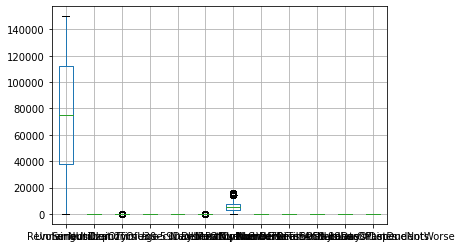

In [30]:
df3.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


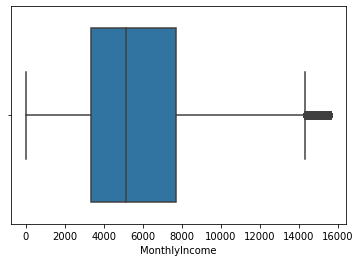

In [31]:
sns.boxplot(df3['MonthlyIncome'])

In [32]:
# chuẩn hóa với minmax scaling
scaler = MinMaxScaler()

mms = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

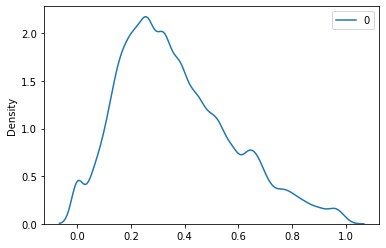

In [33]:
sns.kdeplot(data = mms)

In [34]:
# chuẩn hóa với robust scaling
scaler = RobustScaler()

rbs = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

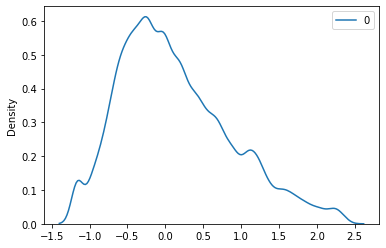

In [35]:
sns.kdeplot(data = rbs)

In [36]:
# chuẩn hóa với standard scaling
scaler = StandardScaler()

sc = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

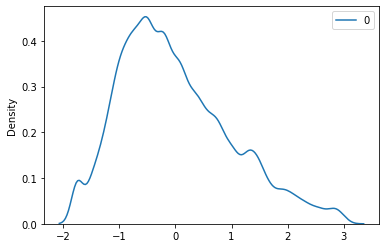

In [37]:
sns.kdeplot(data = sc)